# Estimación de fase iterativa (IPE)


Dado un operador unitario $\hat U$ y un eigenestado $|\Psi\rangle$ de $\hat U$ con un eigenvalor desconocido $e^{i 2\pi \varphi}$, deseamos estimar el valor de $\varphi$.

Suponemos lo siguiente:

$\bullet$ $U$ es un circuito cuántico que implementa $\hat U$ y que podemos implementar la operación *control*-$U^{2^t}$ para el entero positivo $t$.

$\bullet$ Tenemos la capacidad de preparar eficientemente $|\Psi\rangle$.

$\bullet$ $\varphi$ puede tener una expansión binaria exacta:
$$
\varphi = \varphi_1/2^1 + \varphi_2/2^2 + \cdots + \varphi_m/2^m = 0.\varphi_1 \varphi_2 \cdots \varphi_m
$$

$\bullet$ $\hat U$ es un operador unitario que actúa sobre un qubit.

Como la IPE (de *iterative phase estimation*) requiere un qubit auxiliar, necesitamos dos qubits, $q_0$ y $q_1$, donde $q_0$ es el qubit auxiliar y $q_1$ representa el sistema en el que opera $\hat U$.

$\bullet$ Si inicializamos $q_0$ en el estado $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ y $q_1$ en el estado $|\Psi \rangle$, tenemos que
$$
\begin{align}
|+\rangle |\Psi \rangle &= \left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right) |\Psi \rangle \\
&= \frac{|0\rangle |\Psi \rangle + |1\rangle |\Psi \rangle}{\sqrt{2}} \\
&\xrightarrow{\text{control-}U^{2^t}} \frac{|0\rangle |\Psi \rangle + e^{i 2 \pi 2^{t} \varphi} |1\rangle |\Psi \rangle}{\sqrt{2}} \\
&= \left(\frac{|0\rangle + e^{i 2 \pi 2^{t} \varphi} |1\rangle}{\sqrt{2}}\right) |\Psi \rangle.
\end{align}
$$
(*phase kickback*).

Notemos que
$$
e^{i 2 \pi 2^{t} \varphi} = e^{i 2 \pi 2^{t} (0.\varphi_1 \varphi_2 \cdots \varphi_m)}
= e^{i 2 \pi (\varphi_1 \cdots \varphi_t . \varphi_{t + 1} \cdots \varphi_m)}
= e^{i 2 \pi (0. \varphi_{t + 1} \cdots \varphi_m)},
$$
donde en la última igualdad, la parte entera de la representación "decimal" de la fase ha desaparecido porque $e^{i 2\pi n} = 1$ para cualquier entero $n$.
Por ejemplo:
- para $t=0$, la fase sería $e^{i 2 \pi 2^{0} \varphi} = e^{i 2 \pi \varphi} = e^{i 2 \pi 0.\varphi_1 \varphi_2 ... \varphi_m}$
- para $t=1$, la fase sería $e^{i 2 \pi 2^{1} \varphi}= e^{i 2 \pi \varphi_1} e^{i 2 \pi 0.\varphi_2 \varphi_3 ... \varphi_m} = e^{i 2 \pi 0.\varphi_2 \varphi_3 ... \varphi_m}$
- para $t=2$, la fase sería $e^{i 2 \pi 2^{2} \varphi} = e^{i 2 \pi 0.\varphi_3 \varphi_4 ... \varphi_m}$
- para $t=m-1$, la fase sería $e^{i 2 \pi 2^{m-1} \varphi} = e^{i 2 \pi 0.\varphi_m}$.

En el último caso, donde $t = m - 1$, la fase es $e^{i 2 \pi 0.\varphi_m}$, que es igual a $1$ si $\varphi_m = 0$ y $-1$ si $\varphi_m = 1$.
En el primer caso, el qubit auxiliar $q_0$ estaría en el estado $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$, y en el segundo caso estaría
en el estado $|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$. Por lo tanto, medir el qubit en la base Pauli $X$ distinguiría estos casos con una tasa de éxito del 100%.
Esto se hace ejecutando una compuerta Hadamard en el qubit antes de medirlo. En el primer caso mediríamos 0 y en el segundo caso mediríamos 1;
en otras palabras, el bit medido sería igual a $\varphi_m$.

## El algoritmo

$\bullet$ En el primer paso, medimos directamente el bit menos significativo de la fase $\varphi$, $\varphi_m$. Inicializamos los registros de 2 qubits como se describió anteriormente ( $q_0 \rightarrow |+\rangle$ y $q_1 \rightarrow |\Psi \rangle$ ), realizando una operación *control*-$U^{2^{m-1}}$ y midiendo $q_0$ en la base Pauli $X$.

$\bullet$ En el segundo paso, inicializamos los sistemas de la misma manera y aplicamos una operación *control*-$U^{2^{m-2}}$. La fase relativa en $q_0$ después de estas operaciones es ahora $e^{i 2 \pi 0.\varphi_{m-1}\varphi_{m}}= e^{i 2 \pi 0.\varphi_{m-1}} e^{i 2 \pi \varphi_m/4}$.
Para extraer el bit de fase $\varphi_{m-1}$, primero realizamos una corrección de fase rotando alrededor del eje $Z$ en un ángulo $-2 \pi \varphi_m/4=-\pi \varphi_m/2$, lo que da como resultado que el estado de $q_0$ sea $|0\rangle + e^{i 2 \pi 0.\varphi_{m-1}} | 1 \rangle$. Después hacemos una medición en $q_0$ en la base Pauli $X$ para obtener el bit de fase $\varphi_{m-1}$.

$\bullet$ En el paso $k$-ésimo del IPE, obtenemos $\varphi_{m-k+1}$, consistente en la inicialización del registro ($q_0$ en $|+\rangle$, $q_1$ en $|\Psi\rangle$), la aplicación de un $U^{2^{m-k}}$ *controlado*, una rotación alrededor de $Z$ de ángulo $\omega_k = -2 \pi 0.\varphi_{m-k+2} ... \varphi_m$, y una medición de $q_0$ en la base de Pauli $X$: una transformada de Hadamard a $q_0$, y una medición de $q_0$ en la base computacional. Notemos que $q_1$ permanece en el estado $|\Psi\rangle$ durante todo el algoritmo.

## Implementación

Haremos IPE en la compuerta $\hat S$ de un solo qubit,

$$ S =
\begin{pmatrix}
1 & 0\\
0 & e^{i\pi / 2}
\end{pmatrix}$$

Usaremos el estado $|\Psi\rangle = |1\rangle$, con eigenvalor $e^{i\pi / 2}= e^{i2\pi \cdot 1/4}$. Por lo tanto, tenemos $\varphi = 1/4 = 0.01 = 0.\varphi_1 \varphi_2$. Dado que $\varphi$ se puede representar exactamente con 2 bits. Nuestra implementación del circuito cuántico utilizará un registro clásico con dos bits para almacenar el resultado.

La compuerta $S$ controlada se puede implementar utilizando la compuerta de fase controlada, disponible en Qiskit como `CPhaseGate`, que también se puede aplicar llamando al método `cp` de un `QuantumCircuit`. La compuerta de fase controlada está parametrizada por un ángulo $\theta$ y tiene la matriz
$$
\text{CPhase}(\theta) =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\theta}
\end{pmatrix}
$$

### Ejercicio 1

Obtenga el bit menos significativo de $\varphi$ realizando los siguientes pasos:
1. Inicialice los qubits:
- Inicie el qubit auxiliar, $q[0]$, en el estado $|+\rangle$
- Inicie el qubit del sistema, $q[1]$, en el estado $|1\rangle$.
2. Aplique una compuerta *controlada*-$S^{2}$ aplicando una `CPhaseGate` con el ángulo apropiado.
3. Mida el qubit auxiliar en la base $X$.

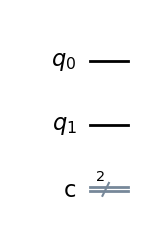

In [ ]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np


def step_1_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr es un registro de 2 qubits
    # cr es un registro de 2 bits

    qc = QuantumCircuit(qr, cr)

    ####### llene el siguiente espacio #######

    

    ###################################

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
qc = step_1_circuit(qr, cr)
qc.draw("mpl")

En el primer paso, medimos el bit menos significativo $\varphi_2$. En el segundo (y último) paso, extraemos el siguiente bit $\varphi_1$, lo que implicará aplicar una corrección de fase para cancelar la contribución de fase de $\varphi_2$. La corrección de fase depende del valor del registro clásico que contiene $\varphi_2$. La corrección de fase se puede aplicar utilizando *PhaseGate*.

## Ejercicio 2


Obtenga el siguiente bit de $\varphi$ realizando los siguientes pasos:
1. Restablezca y reinicialice el qubit auxiliar.
2. Aplique la compuerta unitaria controlada.
3. Mida el qubit auxiliar en la base $X$.

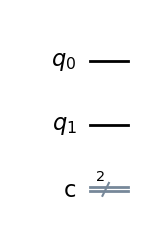

In [3]:
def step_2_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr tiene 2 qubits
    # cr tiene 2 bits

    # comenzamos con el circuito del Ejercicio 1
    qc = step_1_circuit(qr, cr)

    ####### llene el siguiente espacio #######


    ######################################

    return qc



qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
qc = step_2_circuit(qr, cr)
qc.draw("mpl")

In [ ]:
from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')


job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
counts

Si el circuito es correcto, deberías haber obtenido la cadena de bits `01` con un 100 % de probabilidad. Este valor corresponde a la fase escrita en binario como $\varphi = 0.01 = 1/4$.

## Ejercicio 3

Construye un circuito IPE para estimar la fase de la compuerta T,

$$ T =
\begin{pmatrix}
1 & 0\\
0 & e^{i\pi / 4}
\end{pmatrix}$$

¿Cuántos bits se necesitan para representar la fase en este caso?

In [ ]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np


def t_gate_ipe_circuit(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # qr tiene 2 qubits
    # cr tiene 3 bits

    qc = QuantumCircuit(qr, cr)

    ####### llene el siguiente espacio #######


    ###################################

    return qc


qr = QuantumRegister(2, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
qc = t_gate_ipe_circuit(qr, cr)
qc.draw("mpl")

In [ ]:
from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')


job = backend.run(qc,shots=1024)
resultados = job.result()
counts = resultados.get_counts()
counts